Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [ ]:
#pip install Augmentor

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
import Augmentor

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("./Train")
data_dir_test = pathlib.Path('./Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    subset="training",
    seed=123, 
    image_size=(img_height,img_width),
    validation_split=0.2, 
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [6]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    subset="validation",
    seed=123, 
    image_size=(img_height,img_width),
    validation_split=0.2, 
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

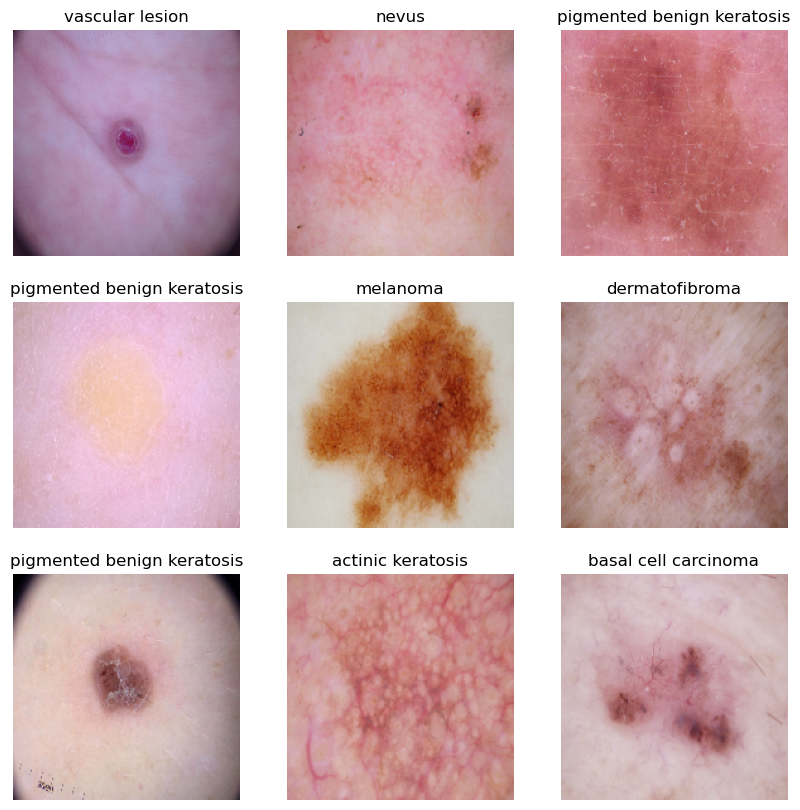

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [11]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 315ms/step - loss: 2.1013 - accuracy: 0.2327 - val_loss: 2.0585 - val_accuracy: 0.1991
Epoch 2/20
56/56 [==============================] - 16s 292ms/step - loss: 1.8721 - accuracy: 0.3343 - val_loss: 1.6872 - val_accuracy: 0.4116
Epoch 3/20
56/56 [==============================] - 16s 290ms/step - loss: 1.5762 - accuracy: 0.4587 - val_loss: 1.6662 - val_accuracy: 0.3937
Epoch 4/20
56/56 [==============================] - 16s 288ms/step - loss: 1.4291 - accuracy: 0.4989 - val_loss: 1.4883 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 16s 287ms/step - loss: 1.3001 - accuracy: 0.5368 - val_loss: 1.4265 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 16s 290ms/step - loss: 1.2583 - accuracy: 0.5541 - val_loss: 1.4156 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 16s 290ms/step - loss: 1.1478 - accuracy: 0.5915 - val_loss: 1.4451 - val_accuracy: 0.4989

### Visualizing training results

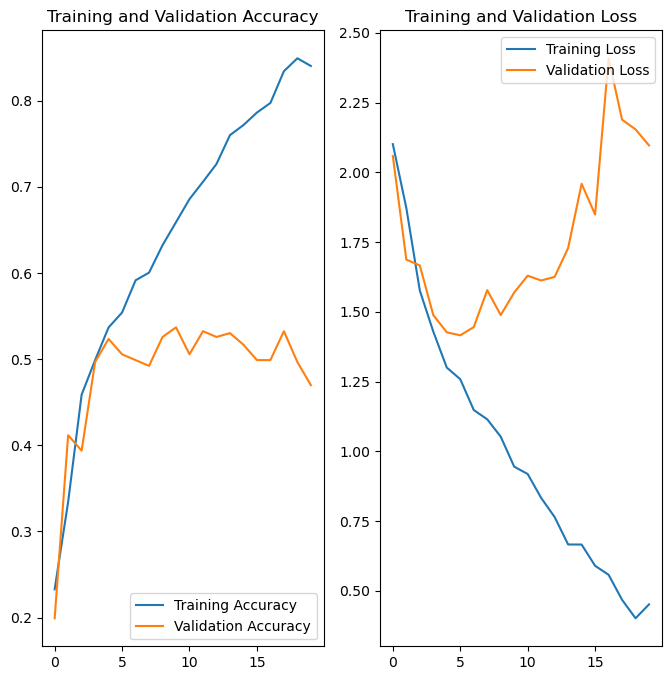

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [16]:
#As we can see the model did overfit by a large margin the train accuracy is healthy 81% where as validation accuracy is measly 52%
#this can occur if samples are not sufficient not taken from different directions.

# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
      layers.experimental.preprocessing.RandomContrast(0.2),
      layers.experimental.preprocessing.RandomCrop(img_height, img_width),
      layers.experimental.preprocessing.RandomRotation(factor=(-0.6,0.6))
  ]
)


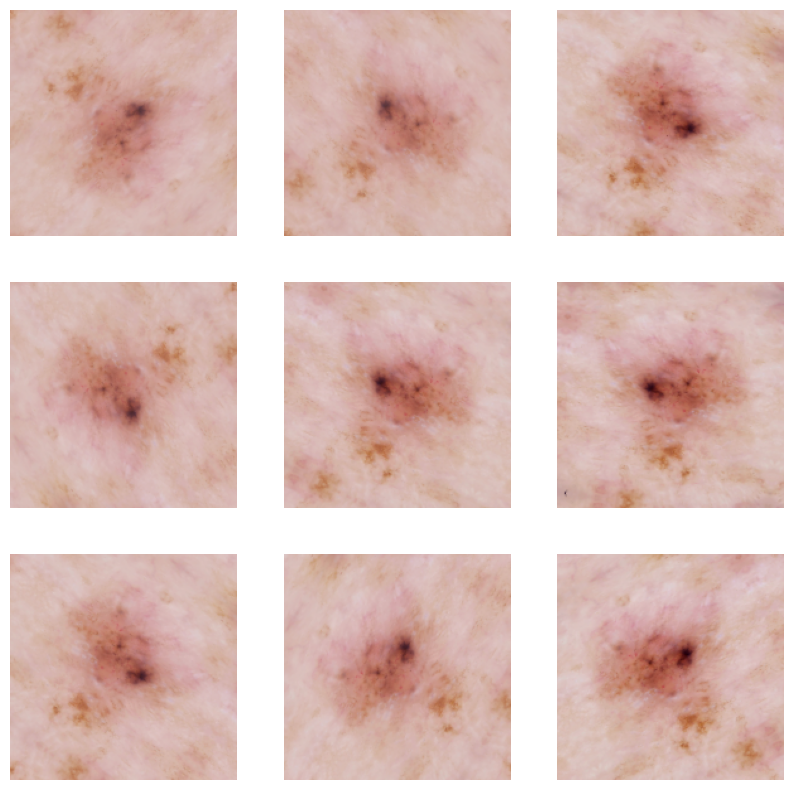

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
    
])
## Your code goes here



### Compiling the model

In [19]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 20s 331ms/step - loss: 2.1017 - accuracy: 0.2439 - val_loss: 1.8427 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 18s 326ms/step - loss: 1.7671 - accuracy: 0.3633 - val_loss: 1.6703 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 18s 324ms/step - loss: 1.5722 - accuracy: 0.4392 - val_loss: 1.5570 - val_accuracy: 0.4295
Epoch 4/20
56/56 [==============================] - 18s 327ms/step - loss: 1.5042 - accuracy: 0.4760 - val_loss: 1.4746 - val_accuracy: 0.4676
Epoch 5/20
56/56 [==============================] - 18s 328ms/step - loss: 1.4414 - accuracy: 0.4900 - val_loss: 1.4051 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 18s 326ms/step - loss: 1.4082 - accuracy: 0.4911 - val_loss: 1.4312 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 18s 325ms/step - loss: 1.3621 - accuracy: 0.5128 - val_loss: 1.3769 - val_accuracy: 0.5190

### Visualizing the results

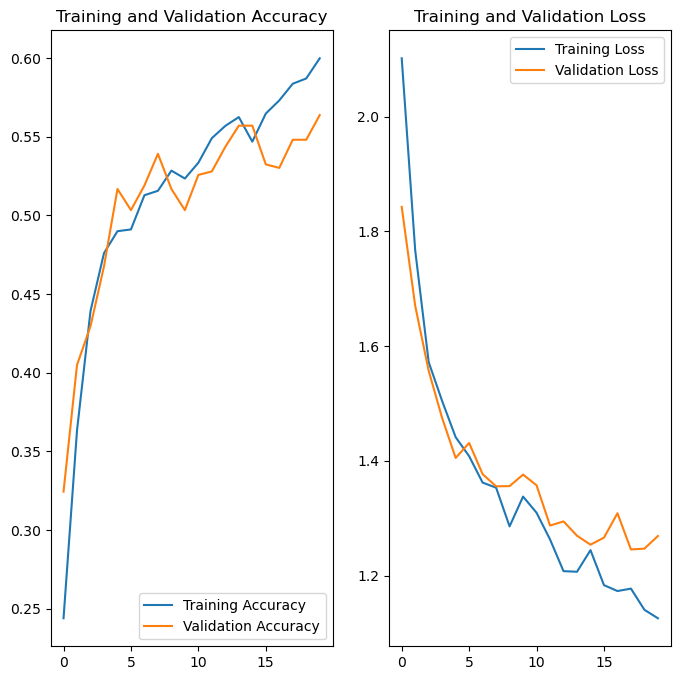

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

As we can see there is a reduction in overfitting. the gap between train and validation accuracy is now reduced. Model is still unstable as the validation and test accuracy is not smooth enough


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

C:\ProgramData\anaconda3\envs\tf-gpu\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 100x1200 with 0 Axes>

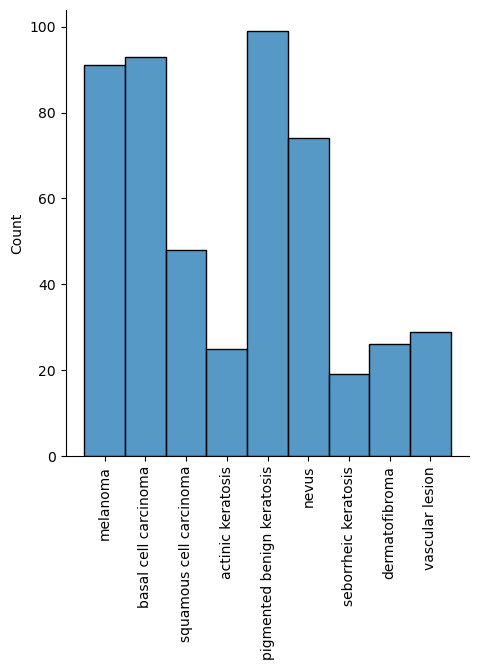

In [22]:
labelsDistri = []
for images, labels in train_ds:
  for i in range(9):
    labelsDistri.append(class_names[labels[i]])
plt.figure(figsize=(1,12))
sns.displot (labelsDistri)
plt.xticks(rotation=90)
plt.show()


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
as we can see seborhetic kertatosis/dermatofiboma and actinic keratosis are having 1/5 of samples
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis/basall cell carcinoma and melanoma are dominatting the samples

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [23]:
#pip!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset="./Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to ./Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C31B5D1A00>: 100%|█| 500/500 [00:02<00:00, 196.21 Samples


Initialised with 376 image(s) found.
Output directory set to ./Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C31D1F9070>: 100%|█| 500/500 [00:02<00:00, 193.70 Samples


Initialised with 95 image(s) found.
Output directory set to ./Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C31B5BF340>: 100%|█| 500/500 [00:02<00:00, 191.40 Samples


Initialised with 438 image(s) found.
Output directory set to ./Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C31AF206D0>: 100%|█| 500/500 [00:11<00:00, 43.79 Samples


Initialised with 357 image(s) found.
Output directory set to ./Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x1C31B5D6C70>: 100%|█| 500/500 [00:12<00:


Initialised with 462 image(s) found.
Output directory set to ./Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C3218673D0>: 100%|█| 500/500 [00:02<00:00, 202.29 Samples


Initialised with 77 image(s) found.
Output directory set to ./Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1C31AFB8C10>: 100%|█| 500/500 [00:05<00:00, 96.41 Samples


Initialised with 181 image(s) found.
Output directory set to ./Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C31B555580>: 100%|█| 500/500 [00:02<00:00, 182.65 Samples


Initialised with 139 image(s) found.
Output directory set to ./Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1C30E413DC0>: 100%|█| 500/500 [00:02<00:00, 200.19 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [26]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [27]:
data_dir_train="./Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [28]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [29]:
## your code goes here
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [30]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [31]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 66s 380ms/step - loss: 1.8424 - accuracy: 0.3019 - val_loss: 1.5413 - val_accuracy: 0.4328
Epoch 2/50
169/169 [==============================] - 62s 365ms/step - loss: 1.5185 - accuracy: 0.4269 - val_loss: 1.4266 - val_accuracy: 0.4625
Epoch 3/50
169/169 [==============================] - 62s 364ms/step - loss: 1.4225 - accuracy: 0.4588 - val_loss: 1.4010 - val_accuracy: 0.4610
Epoch 4/50
169/169 [==============================] - 62s 365ms/step - loss: 1.3736 - accuracy: 0.4740 - val_loss: 1.3347 - val_accuracy: 0.5026
Epoch 5/50
169/169 [==============================] - 63s 368ms/step - loss: 1.3189 - accuracy: 0.4943 - val_loss: 1.4412 - val_accuracy: 0.4981
Epoch 6/50
169/169 [==============================] - 62s 366ms/step - loss: 1.2805 - accuracy: 0.5108 - val_loss: 1.3788 - val_accuracy: 0.4907
Epoch 7/50
169/169 [==============================] - 62s 367ms/step - loss: 1.2563 - accuracy: 0.5191 - val_loss: 1.2633 - val_ac

#### **Todo:**  Visualize the model results

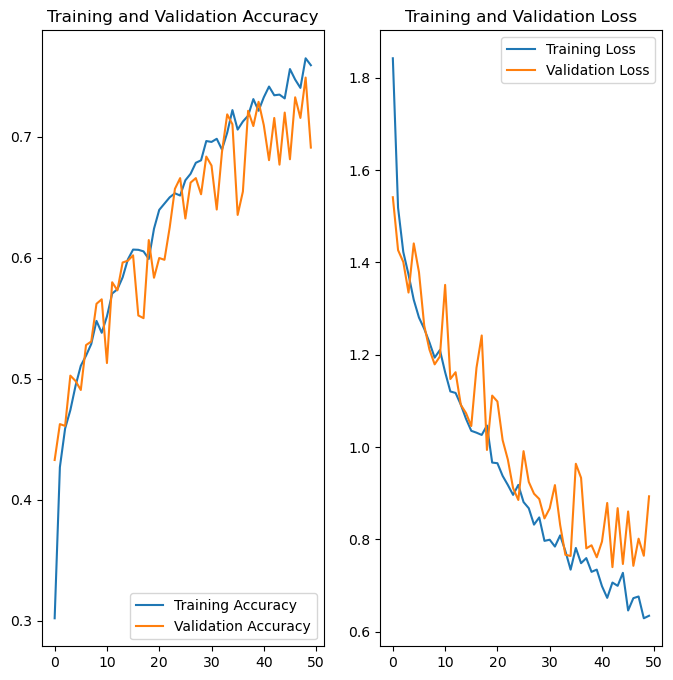

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

As we can see around 30 epoch the validation score has settled downand is not improving. Class rebalance has helped. We see the overfitting has reduced significantly

In [33]:
truePredicted=0
falsePredicted=0
testFiles = list(data_dir_test.glob('*/*.jpg'))
for imagePath in testFiles:
    img = keras.preprocessing.image.load_img(imagePath, target_size=(img_height, img_width))
    
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    
    score = tf.nn.softmax(predictions[0])
    originalClassName=os.path.basename(os.path.dirname(imagePath))
    if(originalClassName==class_names[np.argmax(score)]):
        truePredicted=truePredicted+1
    else:
        falsePredicted=falsePredicted+1

In [34]:
print(f"Truely predicted data {truePredicted} from {len(testFiles)}")
print(f"False predicted data {falsePredicted} from {len(testFiles)}")

Truely predicted data 50 from 118
False predicted data 68 from 118
